# Hyperparameters

Consider the Booth test function (below). This function varies differently in different directions, and these directions are somewhat skewed with respect to the inputs. Our agent will automatically fit the right hyperparameters to account for this.

Text(0, 0.5, 'x2')

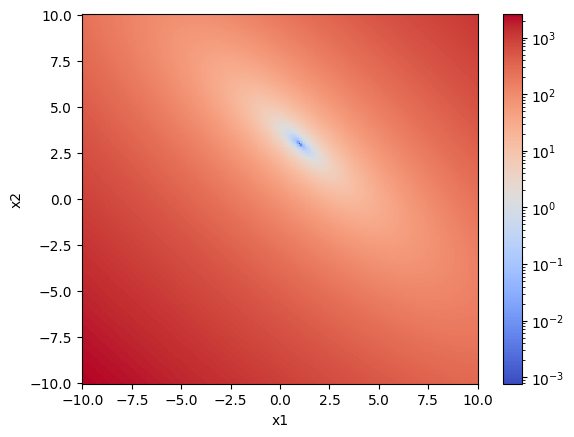

In [1]:
import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt

from blop.utils import functions

x1 = x2 = np.linspace(-10, 10, 256)
X1, X2 = np.meshgrid(x1, x2)

F = functions.booth(X1, X2)

plt.pcolormesh(x1, x2, F, norm=mpl.colors.LogNorm(), shading="auto")
plt.colorbar()
plt.xlabel("x1")
plt.ylabel("x2")

The optimization goes faster if our model understands how the function changes as we change the inputs in different ways. The way it picks up on this is by starting from a general model that could describe a lot of functions, and making it specific to this one by choosing the right hyperparameters. Our Bayesian agent is very good at this, and only needs a few samples to figure out what the function looks like:

In [2]:
def digestion(df):
    for index, entry in df.iterrows():
        df.loc[index, "booth"] = functions.booth(entry.x1, entry.x2)

    return df

2025-03-04 21:32:40.068 INFO: Executing plan <generator object Agent.learn at 0x7fe220b37a70>


2025-03-04 21:32:40.070 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x7fe220de07c0> from 'idle' -> 'running'




Transient Scan ID: 1     Time: 2025-03-04 21:32:40

Persistent Unique Scan ID: 'aee6424b-04b9-45a0-af89-3acd02de2a4f'

New stream: 'primary'

+-----------+------------+------------+------------+

|   seq_num |       time |         x1 |         x2 |

+-----------+------------+------------+------------+

|         1 | 21:32:40.1 |      0.124 |      1.575 |

|         2 | 21:32:40.1 |     -2.356 |      2.470 |

|         3 | 21:32:40.1 |     -4.969 |      4.016 |

|         4 | 21:32:40.1 |     -4.422 |      1.318 |

|         5 | 21:32:40.1 |     -3.692 |     -0.178 |

|         6 | 21:32:40.1 |     -5.745 |     -3.492 |

|         7 | 21:32:40.1 |     -1.632 |     -2.039 |

|         8 | 21:32:40.1 |     -1.056 |     -4.631 |

|         9 | 21:32:40.1 |      0.854 |     -2.920 |

|        10 | 21:32:40.1 |      1.799 |     -5.624 |

|        11 | 21:32:40.1 |      3.491 |     -4.467 |

|        12 | 21:32:40.1 |      5.913 |     -1.077 |

|        13 | 21:32:40.1 |      5.189 |      0.429 |

|        14 | 21:32:40.2 |      4.261 |      3.029 |

|        15 | 21:32:40.2 |      2.575 |      4.882 |

|        16 | 21:32:40.2 |     -0.286 |      5.865 |

+-----------+------------+------------+------------+

generator list_scan ['aee6424b'] (scan num: 1)

2025-03-04 21:32:40.733 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x7fe220de07c0> from 'running' -> 'idle'


2025-03-04 21:32:40.734 INFO: Cleaned up from plan <generator object Agent.learn at 0x7fe220b37a70>


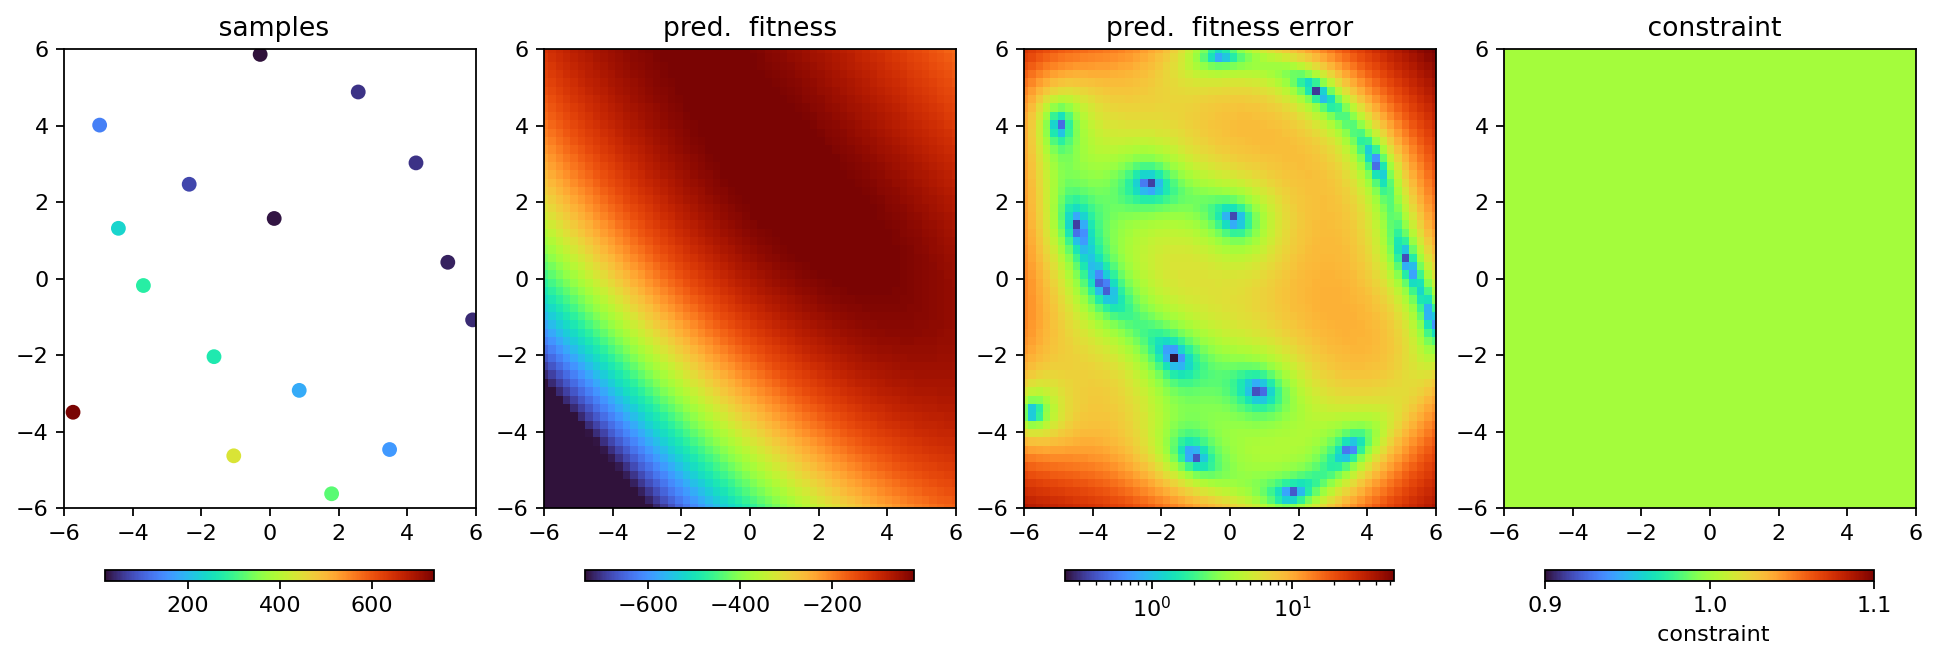

In [3]:
from blop.utils import prepare_re_env  # noqa

%run -i $prepare_re_env.__file__ --db-type=temp

from blop import DOF, Agent, Objective

dofs = [
    DOF(name="x1", search_domain=(-6, 6)),
    DOF(name="x2", search_domain=(-6, 6)),
]

objectives = [
    Objective(name="booth", target="min"),
]


agent = Agent(
    dofs=dofs,
    objectives=objectives,
    digestion=digestion,
    db=db,
)

RE(agent.learn(acqf="qr", n=16))

agent.plot_objectives()

In addition to modeling the fitness of the task, the agent models the probability that an input will be feasible:

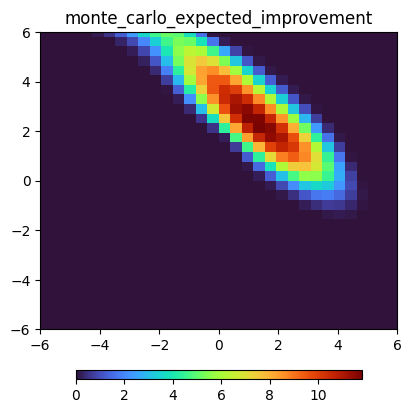

In [4]:
agent.plot_acquisition(acqf="qei")

2025-03-04 21:32:42.162 INFO: Executing plan <generator object Agent.learn at 0x7fe21830da80>


2025-03-04 21:32:42.164 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x7fe220de07c0> from 'idle' -> 'running'




Transient Scan ID: 2     Time: 2025-03-04 21:32:45

Persistent Unique Scan ID: '082f23e7-7791-43a7-989f-706a0be06d86'

New stream: 'primary'

+-----------+------------+------------+------------+

|   seq_num |       time |         x1 |         x2 |

+-----------+------------+------------+------------+

|         1 | 21:32:45.2 |     -2.052 |      6.000 |

|         2 | 21:32:45.2 |      0.185 |      3.612 |

|         3 | 21:32:45.2 |      1.310 |      2.341 |

|         4 | 21:32:45.2 |      2.378 |      1.185 |

+-----------+------------+------------+------------+

generator list_scan ['082f23e7'] (scan num: 2)



Transient Scan ID: 3     Time: 2025-03-04 21:32:48

Persistent Unique Scan ID: '6a3f0094-9052-4cf4-8d07-2e311781da4d'

New stream: 'primary'

+-----------+------------+------------+------------+

|   seq_num |       time |         x1 |         x2 |

+-----------+------------+------------+------------+

|         1 | 21:32:48.4 |      1.417 |      2.595 |

|         2 | 21:32:48.4 |      0.931 |      3.024 |

|         3 | 21:32:48.5 |      0.944 |      3.169 |

|         4 | 21:32:48.5 |      0.782 |      3.021 |

+-----------+------------+------------+------------+

generator list_scan ['6a3f0094'] (scan num: 3)



Transient Scan ID: 4     Time: 2025-03-04 21:32:50

Persistent Unique Scan ID: '3dafcb21-b205-4705-87ae-43122e966336'

New stream: 'primary'

+-----------+------------+------------+------------+

|   seq_num |       time |         x1 |         x2 |

+-----------+------------+------------+------------+

|         1 | 21:32:50.3 |      0.683 |      2.903 |

|         2 | 21:32:50.3 |      0.902 |      3.009 |

|         3 | 21:32:50.3 |      1.016 |      2.976 |

|         4 | 21:32:50.3 |      0.827 |      3.202 |

+-----------+------------+------------+------------+

generator list_scan ['3dafcb21'] (scan num: 4)



Transient Scan ID: 5     Time: 2025-03-04 21:32:51

Persistent Unique Scan ID: '3411f850-1c18-41b1-8588-e8aaa79405bc'

New stream: 'primary'

+-----------+------------+------------+------------+

|   seq_num |       time |         x1 |         x2 |

+-----------+------------+------------+------------+

|         1 | 21:32:51.7 |      0.865 |      3.147 |

|         2 | 21:32:51.7 |      0.926 |      3.047 |

|         3 | 21:32:51.7 |      1.036 |      2.963 |

|         4 | 21:32:51.7 |     -0.341 |      3.560 |

+-----------+------------+------------+------------+

generator list_scan ['3411f850'] (scan num: 5)

2025-03-04 21:32:52.102 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x7fe220de07c0> from 'running' -> 'idle'


2025-03-04 21:32:52.103 INFO: Cleaned up from plan <generator object Agent.learn at 0x7fe21830da80>


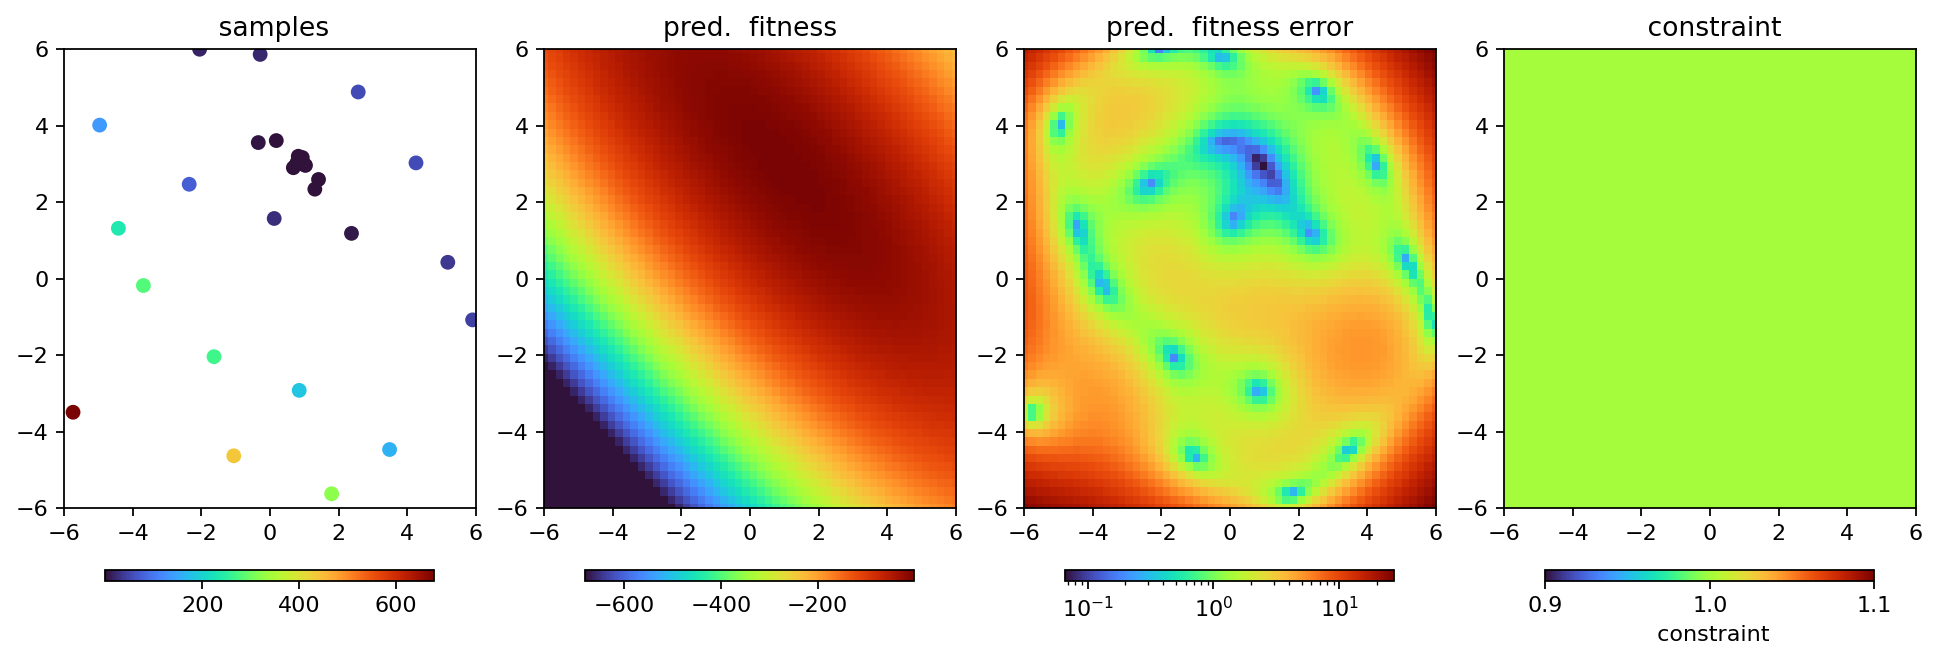

In [5]:
RE(agent.learn("qei", n=4, iterations=4))
agent.plot_objectives()

In [6]:
agent.best

x1                               1.016144
x2                               2.975887
booth                            0.001096
time        2025-03-04 21:32:50.347184181
acqf     monte_carlo_expected_improvement
Name: 26, dtype: object